In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import salamander

In [2]:
counts_sbs = pd.read_csv("data/pcawg_breast_sbs.csv", index_col=0)

# NMF with KL-divergence loss

In [3]:
n_signatures = 6

# NMF with Poisson noise
model = salamander.KLNMF(
    n_signatures=n_signatures,
    max_iterations=500
)
model.fit(counts_sbs)

The fitted signatures and exposures of an NMF model can be accessed via $\texttt{model.signatures}$ and $\texttt{model.exposures}$ respecively:

In [4]:
model.signatures.head()

,Sig1,Sig2,Sig3,Sig4,Sig5,Sig6
A[C>A]A,0.001248,0.024571,1.192093e-07,4.721261e-03,0.018074,1.192093e-07
A[C>A]C,0.000681,0.020049,1.192093e-07,3.669089e-03,0.011239,1.192093e-07
A[C>A]G,0.000129,0.003057,2.414425e-06,2.070712e-07,0.002055,2.136635e-03
A[C>A]T,0.000716,0.020580,1.531850e-07,4.407126e-03,0.005132,1.192093e-07
C[C>A]A,0.001614,0.020466,1.192093e-07,5.339665e-03,0.010673,1.192093e-07


In [5]:
model.exposures.head()

,SP9251,SP6730,SP10084,SP5381,SP10635,SP2714,SP11235,SP8085,SP4593,SP4820,...,SP117778,SP117032,SP117710,SP117538,SP124207,SP117800,SP117724,SP124193,SP2766,SP6115
Sig1,3.251363e+02,2.062715e+02,5.849095e+02,1.410116,92.453678,1547.064276,223.642759,513.973681,1.890952e+02,151.498966,...,33.029338,12.218010,5.171597e+02,1.012496e+03,455.696640,404.471391,56.655390,1.001028e+03,2.972501e+02,59.684006
Sig2,3.588094e+03,1.483835e+03,7.361966e+03,451.480990,718.102882,8087.728427,2217.979781,1916.999076,6.080309e+02,5942.633696,...,936.246811,916.652593,6.496432e+02,8.059791e+03,5271.611606,1812.121813,742.516143,4.159306e+02,6.769267e+03,981.116053
Sig3,2.487877e+02,8.147795e+01,9.983050e-02,14.539060,0.002642,1767.046343,127.602004,223.622632,1.192093e-07,144.238936,...,32.217488,69.122146,1.192093e-07,3.502943e+02,84.237888,141.020668,147.121916,1.192093e-07,2.362026e+02,135.768068
Sig4,1.192093e-07,1.192093e-07,1.192093e-07,16.053948,0.000008,0.020059,0.000004,0.003847,1.192093e-07,85.060638,...,2.350734,32.085219,5.429293e+01,7.075199e+01,444.295977,23.227823,26.058433,7.802276e-06,1.192093e-07,0.001353
Sig5,6.620987e+02,2.580048e+03,1.137024e+03,753.515886,1131.164000,0.007499,1500.986417,1537.400763,1.230776e+03,274.523288,...,1489.900214,1098.998061,1.189189e+03,1.583666e-07,1595.521118,1786.158187,1673.027657,1.018386e+03,2.039184e-04,859.555656


All implemented NMF models also come with methods to visualize the signatures, the exposures, and the signature or sample correlations:

array([<Axes: title={'center': 'Sig1'}>, <Axes: title={'center': 'Sig2'}>,
       <Axes: title={'center': 'Sig3'}>, <Axes: title={'center': 'Sig4'}>,
       <Axes: title={'center': 'Sig5'}>, <Axes: title={'center': 'Sig6'}>],
      dtype=object)

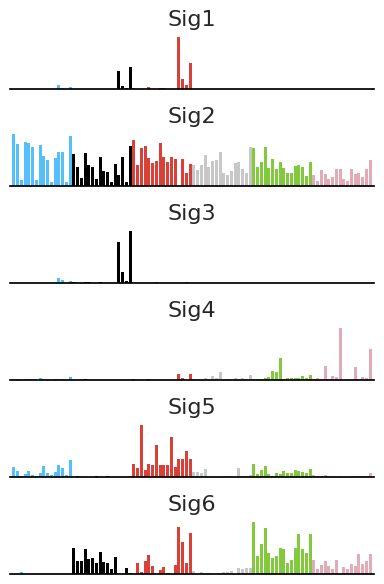

In [6]:
model.plot_signatures()

Like all other plotting methods, $\texttt{plot\_signatures()}$ just wraps around matplotlib and returns the matplotlib axes instances. This makes it effortless to apply custom modifications to a plot. For example, it is possible to rearrange the signature plots to our liking, widen all bars, and change the fontsize:

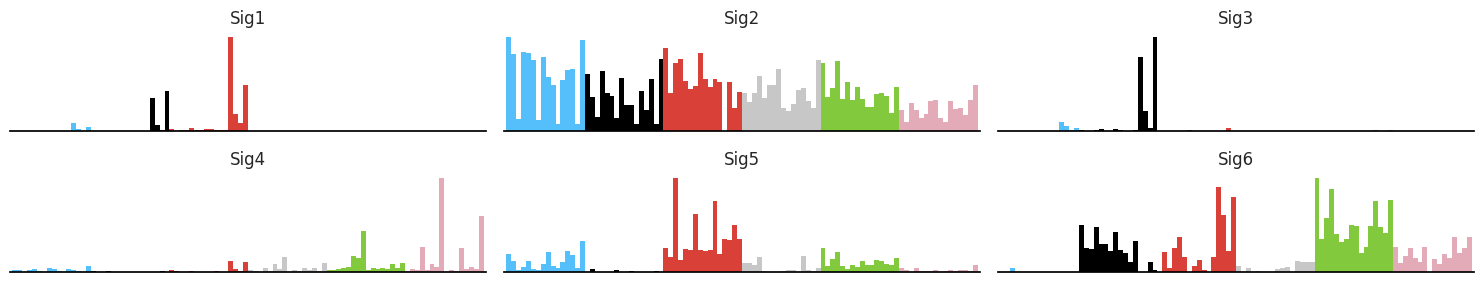

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 3))
axes = model.plot_signatures(axes=axes, width=1)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=12)

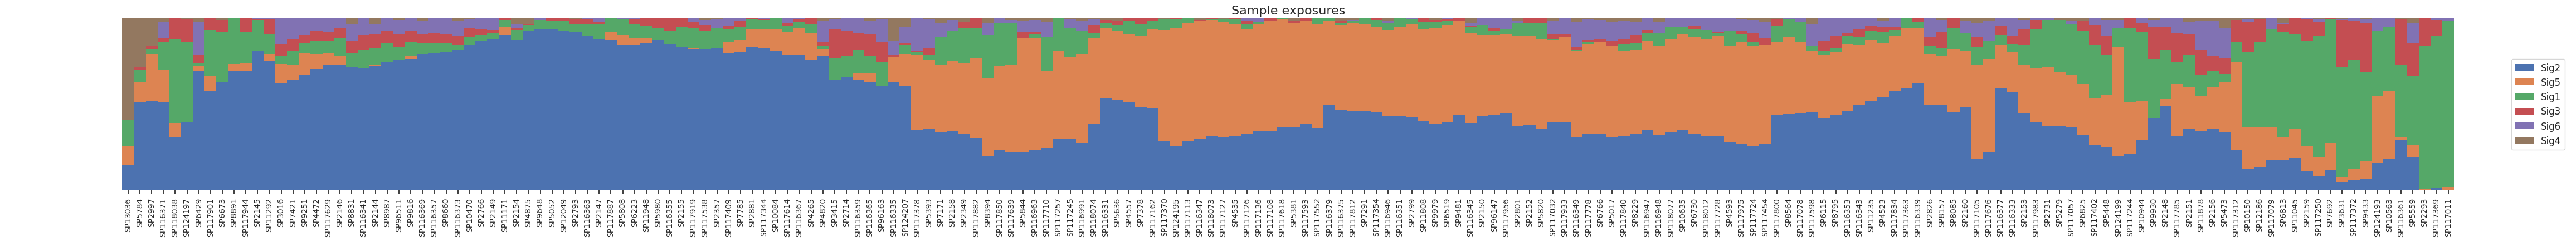

In [8]:
# stacked barplot of the exposures
_ = model.plot_exposures()

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

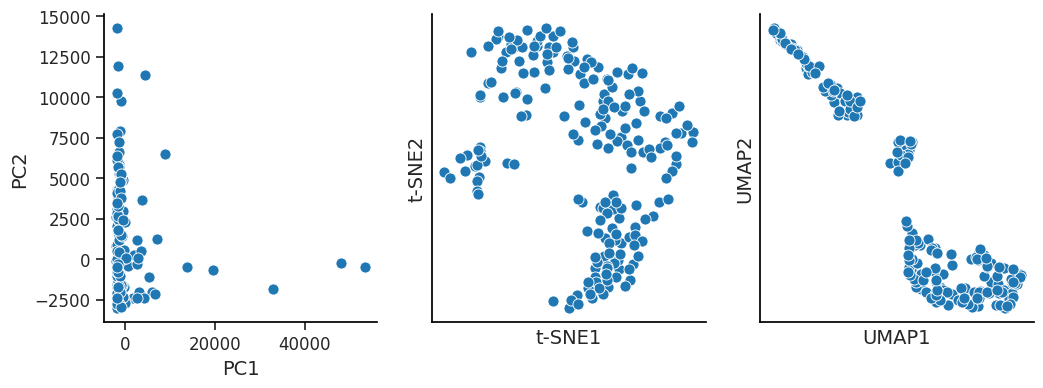

In [9]:
# PCA, t-SNE or UMAP of the sample exposures
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

model.plot_embeddings(method="pca", ax=axes[0])
model.plot_embeddings(method="tsne", ax=axes[1])
model.plot_embeddings(method="umap", ax=axes[2])

Let's say we want to color all samples with a high relative exposure to a certain signature. Again, the UMAP, t-SNE and PCA implementations just wrap around seaborns scatterplot and customizations can be made.

In [10]:
special_signature = "Sig1"
threshold = 0.2

relative_exposures = model.exposures / model.exposures.sum(axis=0)
relative_exposures = relative_exposures.T # signatures as columns
special_samples = relative_exposures.loc[relative_exposures[special_signature] >= threshold].index.to_numpy()

group_labels = [
    "special group" if sample in special_samples else "other"
    for sample in model.sample_names
]

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

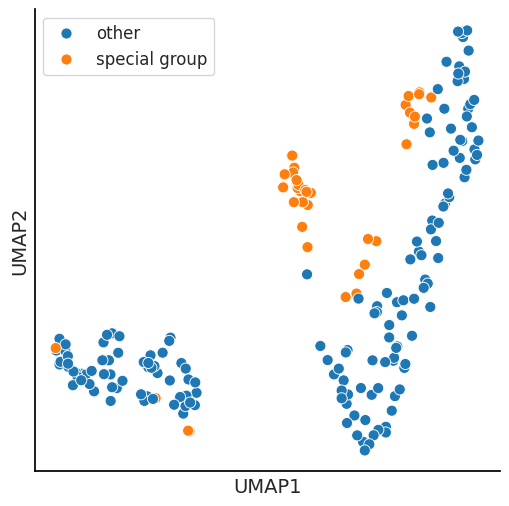

In [11]:
# colored UMAP
model.plot_embeddings(method="umap", hue=group_labels)

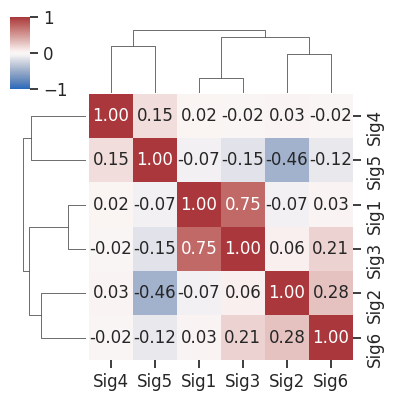

In [12]:
# signature correlations
model.plot_correlation(annot=True, figsize=(4,4))

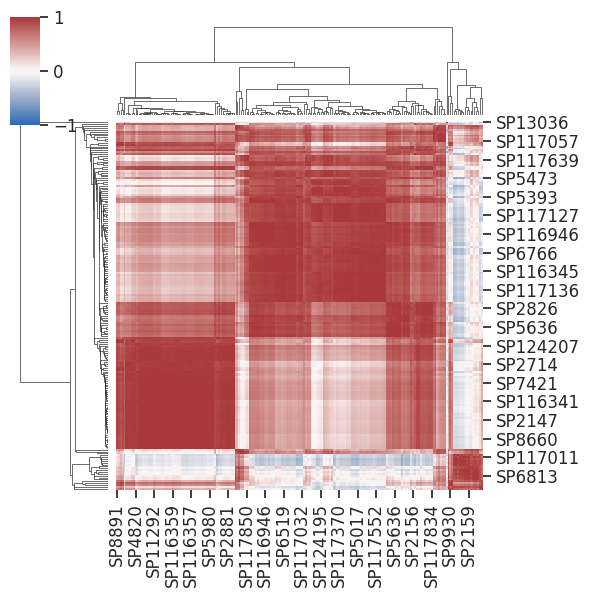

In [13]:
# sample correlations
model.plot_correlation(data="samples")

## Fixing a priori known signatures

Salamander supports fixing arbitrary many a priori known signatures during inference.

array([<Axes: title={'center': 'SP6730'}>,
       <Axes: title={'center': 'SP4820'}>,
       <Axes: title={'center': 'Sig1'}>, <Axes: title={'center': 'Sig2'}>,
       <Axes: title={'center': 'Sig3'}>], dtype=object)

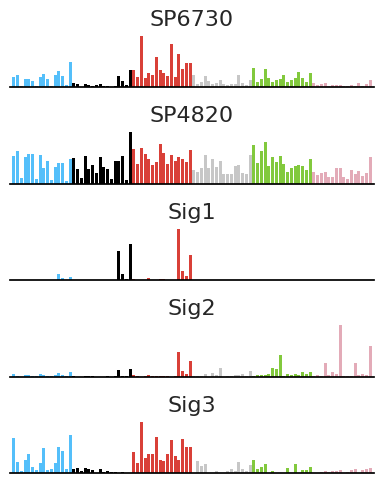

In [14]:
# in practice: use catalog signatures instead
my_known_signatures = pd.DataFrame(counts_sbs[["SP6730", "SP4820"]])

model = salamander.KLNMF(n_signatures=5, max_iterations=500)
model.fit(counts_sbs, given_signatures=my_known_signatures)
model.plot_signatures()

# Other NMF models

The syntax for minimum volume NMF and correlated NMF is identical, and fixing a priori known signatures is also supported for these NMF models. In this tutorial, we only run these models for 3 iterations because of their longer runtime.

**Note**: The first iteration of an algorithm takes a while because the update rules for the parameters are just-in-time compiled with [numba](https://numba.pydata.org/). All subsequent iterations and runs are much faster!

In [15]:
# lam: volume penalty hyperparameter in the loss function of mvNMF
model_mvnmf = salamander.MvNMF(
    n_signatures=n_signatures,
    lam=1,
    max_iterations=3
)
model_mvnmf.fit(counts_sbs)

In [16]:
# dim_embeddings: common embedding dimension of the signatures and samples
model_corrnmf = salamander.CorrNMFDet(
    n_signatures=n_signatures,
    dim_embeddings=n_signatures,
    max_iterations=3
)
model_corrnmf.fit(counts_sbs)

The only difference to the above visualizations with these models is that the embedding plot of CorrNMF show the signature embeddings as well.

# Multimodal correlated NMF

Multimodal correlated NMF can process multiple data modalities at once assuming the input data of each modality originates from the identical samples.

In [17]:
counts_indel = pd.read_csv("data/pcawg_breast_indel.csv", index_col=0)
n_features_indel = len(counts_indel.index)

# 196 samples with single base substitution data, a subset of 192 samples have indel data
counts_sbs = counts_sbs[counts_indel.columns]
n_features_sbs = len(counts_sbs.index)

In [18]:
multi_model = salamander.MultimodalCorrNMF(
    n_modalities=2,
    ns_signatures=[5, 3],
    dim_embeddings=5,
    min_iterations=50,
    max_iterations=50
)
multi_model.fit(data=[counts_sbs, counts_indel], history=True)

The above cell should take about ten seconds to execute. We can examine the convergence of the algorithm by checking the history of the objective function.

**Important note**: The number of iterations specified above is insufficient and the obtained result is not meaningful. This tutorial only focuses on the usage of the package, not on any results.

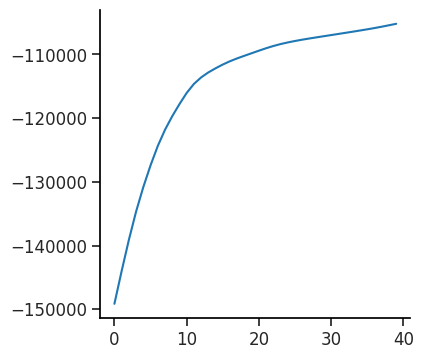

In [19]:
history = multi_model.history["objective_function"]

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(np.arange(len(history[10:])), history[10:])

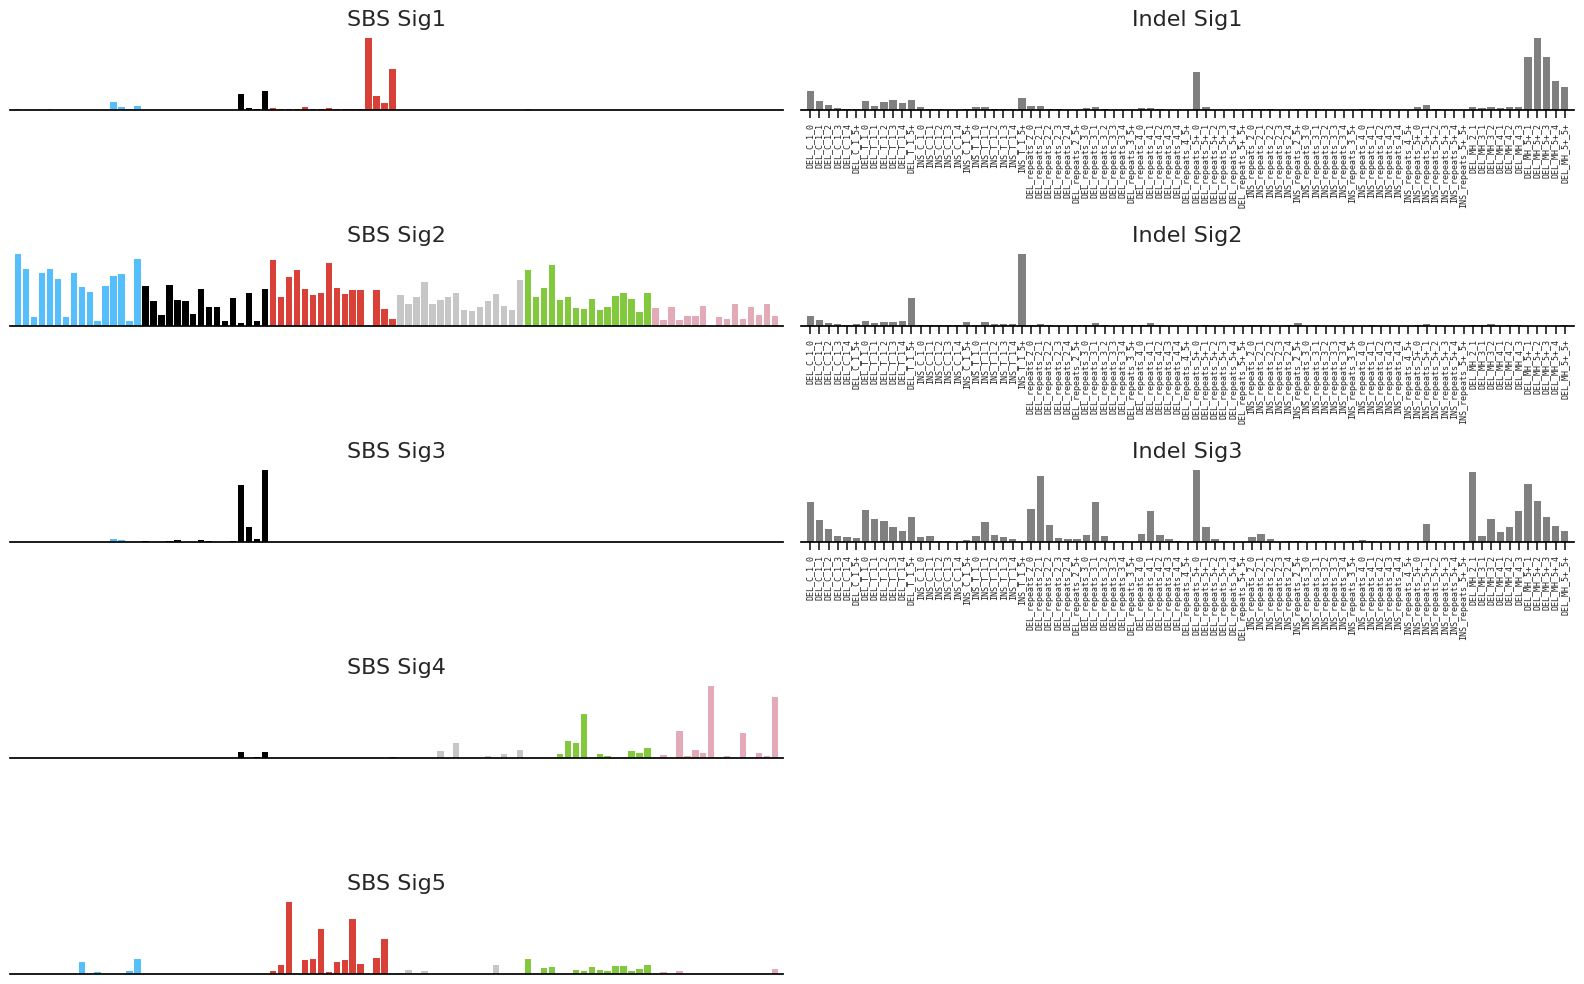

In [20]:
axes = multi_model.plot_signatures(annotate_mutation_types=True)

# remove mutation type annotations for the SBS signatures
for ax in axes[:,0]:
    ax.set_xticks([])

for ax in axes.flatten():
    ax.tick_params(axis="x", which="major", labelsize=6)

plt.tight_layout()

array([<Axes: title={'center': 'SBS signature exposures'}>,
       <Axes: title={'center': 'Indel signature exposures'}>],
      dtype=object)

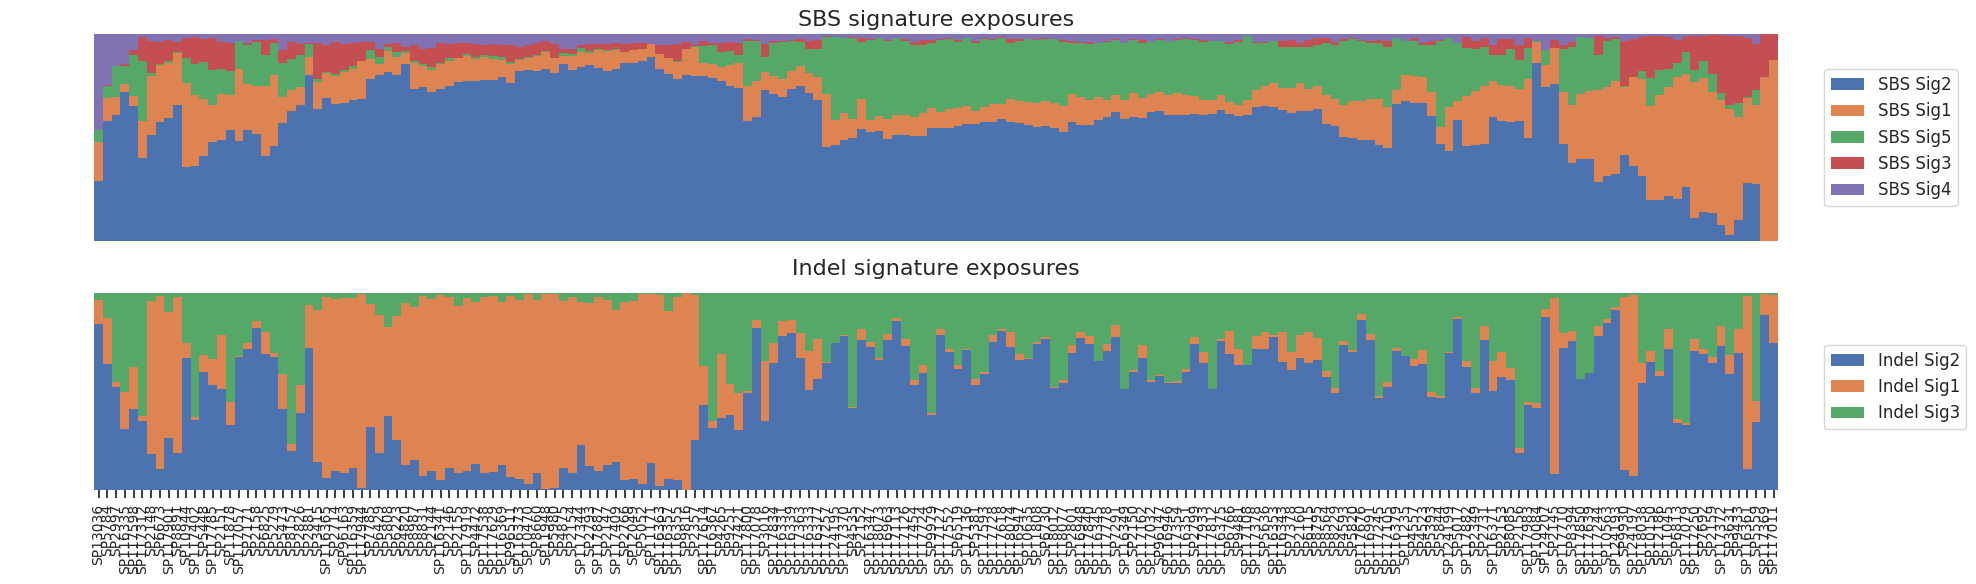

In [21]:
# exposures for each data modality
# samples are ordered jointly
multi_model.plot_exposures()

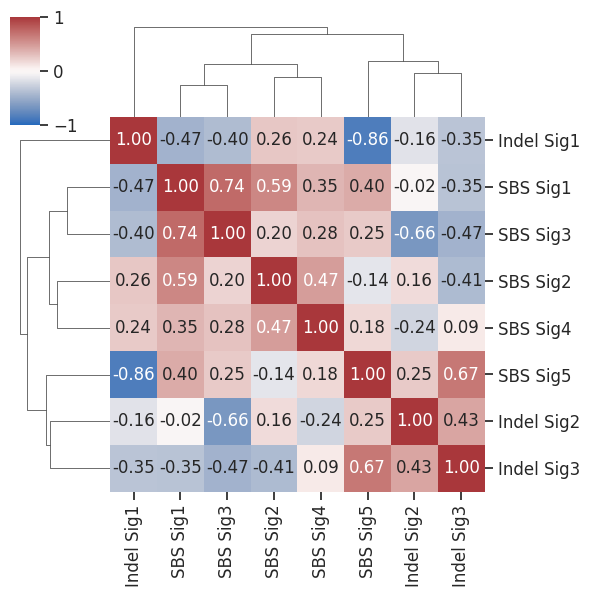

In [22]:
multi_model.plot_correlation(figsize=(6, 6), annot=True)

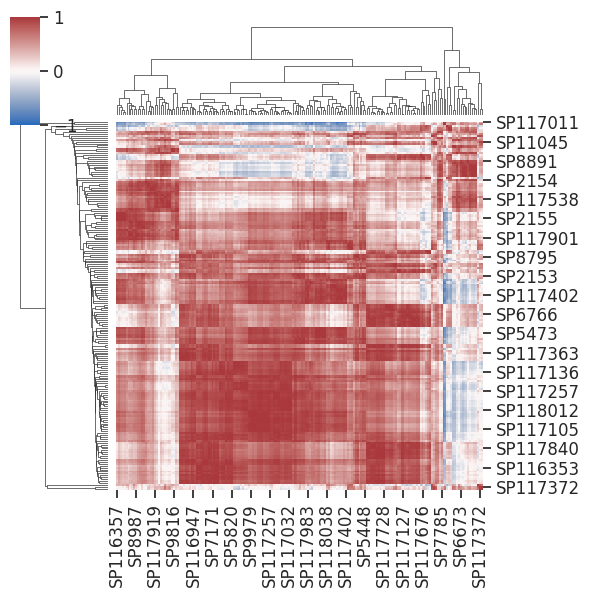

In [23]:
multi_model.plot_correlation(data="samples")

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

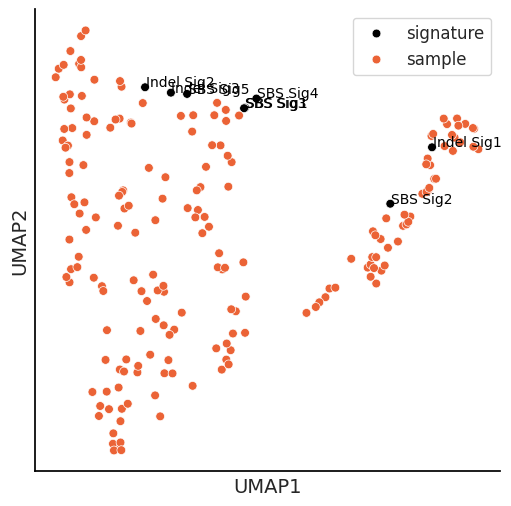

In [24]:
# change the color of the points in the embedding plot
palette = [(0, 0, 0), (0.92, 0.39, 0.21)]
hue = np.sum(multi_model.ns_signatures) * ["signature"] + multi_model.n_samples * ["sample"]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
multi_model.plot_embeddings(
    method="umap",
    hue=hue,
    palette=palette,
    s=40,
    annotation_kwargs={"fontsize": 10},
    ax=ax
)

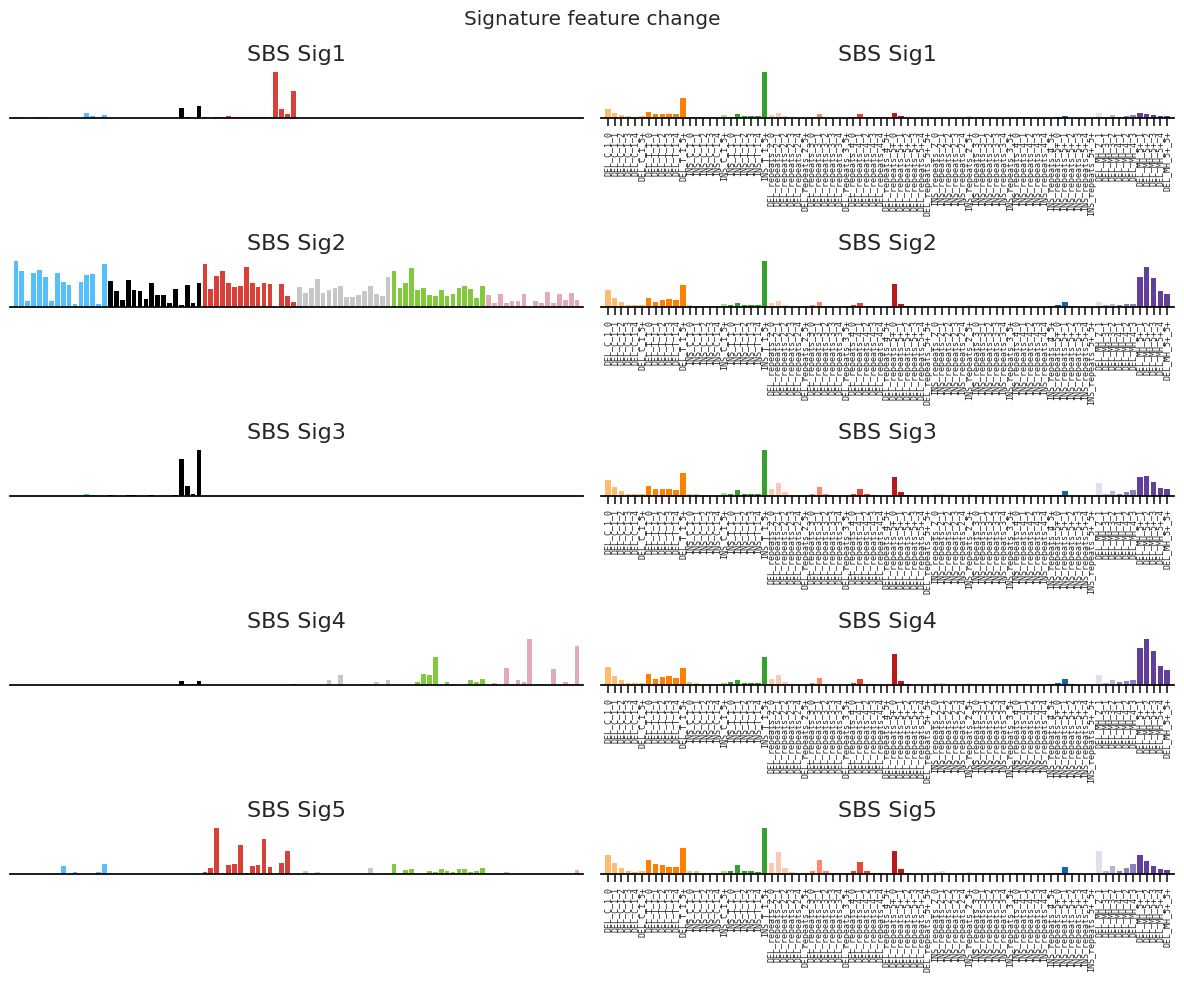

In [25]:
# co-occuring Indel spectra of all SBS signatures
axes = multi_model.plot_feature_change(
    in_modality="SBS",
    colors=["SBS96", "Indel83"],
    annotate_mutation_types=True,
    figsize=(12, 10)
)

for ax in axes[:,0]:
    ax.set_xticks([])

for ax in axes.flatten():
    ax.tick_params(axis="x", which="major", labelsize=6)

plt.tight_layout()